In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
import random
from numpy.random import permutation
import math
from sklearn import metrics

In [81]:
random.seed(1234)

In [82]:
col_names = ['Age','Gender','Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS','1','Amphet','3','4','5','6','7','Coke','9','10','Heroin','12','13','LSD','Meth','16','17','18','19']

In [83]:
directory = '~/Desktop/NYU/Fall 2019/Programming for Data Science/Project_CDS/data/'
data = pd.read_csv(directory + "drug_consumption.csv", names = col_names)

In [84]:
data['Age'] = round(data['Age'],3)
data['Gender'] = round(data['Gender'],3)
data['Education']= round(data['Education'],3)
data['Country'] = round(data['Country'],3)
data['Ethnicity'] = round(data['Ethnicity'],3)

data['Age'] = data['Age'].map({-0.952:"1", -0.079:"2", 0.498:"3", 1.094:"4", 1.822:"5", 2.592:"6"})

data['Gender'] = data['Gender'].map({0.482:'Female', -0.482:'Male'})

data['Education'] = data['Education'].map({-2.436:'1', -1.738: '2',-1.437:'3', -1.228:'4', -0.611: '5', -0.059:'6',0.455: '7', 1.164: '8', 1.984:'9'}) 

data['Country'] = data['Country'].map({-0.098: '1', 0.249:'2', -0.468:'3', -0.285:'4', 0.211:'5',0.961:'6', -0.570:'7'})

data['Ethnicity'] = data['Ethnicity'].map({-0.502:'1', 
-1.107:'2', 
1.907: '3', 
0.126: '4', 
-0.222: '5', 
0.114: '6',  
-0.317: '7'})

In [85]:
amended_data = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,19,22,25,26]]

In [86]:
encoded_data = amended_data.copy()
encoded_data['Drug_indicator'] = amended_data[['Amphet', 'Coke', 'Heroin', 'LSD', 'Meth']].max(axis = 1)

In [87]:
def string_to_numeric(x):
    if x == 'Female' :
        return 1
    if x == 'Male' :
        return 0

In [88]:
encoded_data['Gender'] = encoded_data['Gender'].apply(string_to_numeric)

In [89]:
# Randomly shuffle the index.
random_indices = permutation(encoded_data.index)

# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(encoded_data)/3)

# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = encoded_data.loc[random_indices[1:test_cutoff]]

# Generate the train set with the rest of the data.
train = encoded_data.loc[random_indices[test_cutoff:]]

# Multi-class Classification - Random Forest

In [90]:
# The columns that we will be making predictions with.
x_columns = ['Age','Gender','Education','Country','Ethnicity','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']
# The column that we want to predict.
y_column = ['Drug_indicator']

In [91]:
train.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,Impulsive,SS,Amphet,Coke,Heroin,LSD,Meth,Drug_indicator
305,4,0,8,6,7,-0.46725,-0.57545,-0.71727,1.11406,0.75830,-0.71126,-0.52593,CL0,CL0,CL0,CL0,CL0,CL0
1786,1,0,5,7,7,0.04257,-0.15487,2.44904,-1.07533,-1.51840,1.86203,1.92173,CL6,CL0,CL0,CL0,CL0,CL6
583,2,0,7,6,7,-0.24649,0.16767,-0.31776,-1.21213,0.75830,1.29221,0.40148,CL0,CL0,CL0,CL0,CL0,CL0
1174,1,0,5,4,7,0.82562,-0.15487,-0.01928,-1.34289,-0.89891,-1.37983,0.07987,CL2,CL3,CL0,CL0,CL5,CL5
106,2,1,5,6,7,1.02119,-0.30033,-1.82919,0.28783,-0.40581,-1.37983,-0.84637,CL0,CL0,CL0,CL0,CL0,CL0


In [92]:
trainy = np.array(train[y_column]).reshape(1257)

Criterion is the function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "Entropy" for the information gain.

In [93]:
rfc=RandomForestClassifier(criterion='entropy')
rfc.fit(train[x_columns],trainy)
rfc_preds=rfc.predict(test[x_columns])

/Users/jaejinkim/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [94]:
# Two ways of getting accuracy
print(rfc.score(test[x_columns],test[y_column]))
print("Accuracy:",metrics.accuracy_score(rfc_preds, test[y_column]))

0.3923444976076555
Accuracy: 0.3923444976076555


In [95]:
rfc2=RandomForestClassifier(criterion='gini')
rfc2.fit(train[x_columns],trainy)
rfc_preds2=rfc2.predict(test[x_columns])

/Users/jaejinkim/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [96]:
# Two ways of getting accuracy
print(rfc2.score(test[x_columns],test[y_column]))
print("Accuracy:",metrics.accuracy_score(rfc_preds2, test[y_column]))

0.38915470494417864
Accuracy: 0.38915470494417864


In [97]:
f1_score(test[y_column], rfc_preds2, average='weighted')

0.3463411910542173

# Binary Classification - logistic regression

## convert y to be binary

In [98]:
binary_data = encoded_data

NameError: name 'encoded_data' is not defined

In [99]:
binary_data.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,Impulsive,SS,Amphet,Coke,Heroin,LSD,Meth,Drug_indicator
0,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL2,CL0,CL0,CL0,CL0,CL2
1,2,0,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL2,CL3,CL0,CL2,CL3,CL3
2,3,0,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0,CL0,CL0,CL0,CL0,CL0
3,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0,CL2,CL0,CL0,CL0,CL2
4,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL1,CL0,CL0,CL0,CL0,CL1


In [2]:
binary_data = binary_data.replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,1,2,2,3,3])
binary_data['Drug_indicator'] = binary_data['Drug_indicator'].map({0:0, 1:1, 2:1, 3:1})

NameError: name 'binary_data' is not defined

In [101]:
# Randomly shuffle the index.
random_indices = permutation(binary_data.index)

# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(binary_data)/3)

# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = binary_data.loc[random_indices[1:test_cutoff]]

# Generate the train set with the rest of the data.
train = binary_data.loc[random_indices[test_cutoff:]]

NameError: name 'permutation' is not defined

In [102]:
lr = LogisticRegression()
lr.fit(train[x_columns], train[y_column])
lr_preds = lr.predict(test[x_columns])

/Users/jaejinkim/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jaejinkim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
print(lr.score(test[x_columns], test[y_column]))

0.773524720893142


In [104]:
def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

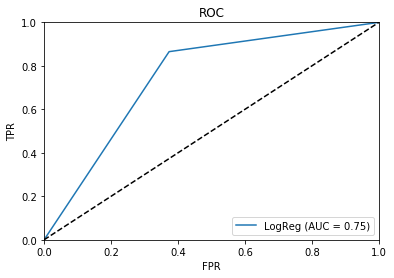

In [105]:
plotAUC(test[y_column], lr_preds,'LogReg')